In [5]:
import h5py 
import mat73
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
subs = ['06','07','10','12','13','15','16','17','18','21']
time_btwn_show_card_and_movement = []
subs_with_area = {}
brain_areas_of_interest = {'angular gyrus R':0,
                            'cingulate cortex (posterior) R':0, 
                           'cuneus R':0, 
                           'fusiform gyrus L':0,
                           'hippocampus (anterior) L':0,
                           'inferior frontal gyrus (pars triangularis) R':0,
                           'insular cortex (anterior) R':0, 
                           'intraparietal sulcus R':0,
                           'middle temporal gyrus L':0, 
                           'middle temporal gyrus R':0,
                           'occipital gyrus L':0, 
                           'occipital gyrus R':0, 
                           'parietal operculum L':0,
                           'superior temporal sulcus R':0, 
                           'supramarginal gyrus L':0,
                           'supramarginal gyrus R':0}

for sub in subs:
    ncsl_share = '/mnt/ncsl_share'
    setup_path = ncsl_share + f'/Public/EFRI/1_formatted/SUBJECT{sub}/EFRI{sub}_WAR_SES1_Setup.mat'
    setup_data = mat73.loadmat(setup_path)

    elec_areas = np.array(setup_data['elec_area'])

    for area in brain_areas_of_interest.keys():
        if area in elec_areas:
            brain_areas_of_interest[area] += 1

    # if 'cuneus R' in elec_areas:
    #     print(sub)

    # print(setup_data['trial_times'][0][0])

    time_btwn_show_card_and_movement_for_subject = []

    for i in range(len(setup_data['trial_times'])):
        trial_words = setup_data['trial_words'][i][0]
        trial_times = setup_data['trial_times'][i][0]
        if 31 in trial_words and 35 in trial_words: 
            show_card_time = np.where(trial_words == 31)[0]
            start_move_time = np.where(trial_words == 35)[0]
            time_btwn_show_card_and_movement_for_subject.append(trial_times[start_move_time] - trial_times[show_card_time])

    time_btwn_show_card_and_movement.append(np.mean(time_btwn_show_card_and_movement_for_subject))

In [10]:
brain_areas_of_interest

{'angular gyrus R': 5,
 'cingulate cortex (posterior) R': 6,
 'cuneus R': 2,
 'fusiform gyrus L': 5,
 'hippocampus (anterior) L': 5,
 'inferior frontal gyrus (pars triangularis) R': 2,
 'insular cortex (anterior) R': 2,
 'intraparietal sulcus R': 3,
 'middle temporal gyrus L': 6,
 'middle temporal gyrus R': 5,
 'occipital gyrus L': 3,
 'occipital gyrus R': 3,
 'parietal operculum L': 3,
 'superior temporal sulcus R': 4,
 'supramarginal gyrus L': 5,
 'supramarginal gyrus R': 3}

In [4]:
time_btwn_show_card_and_movement

[3.028191891891895,
 3.233858024691354,
 3.648013888888874,
 3.869632352941167,
 3.1138110465116315,
 3.5006337579617828,
 3.206803030303032,
 3.295793749999993,
 3.3865844155844154,
 3.240692307692313]

(2.5, 4.0)

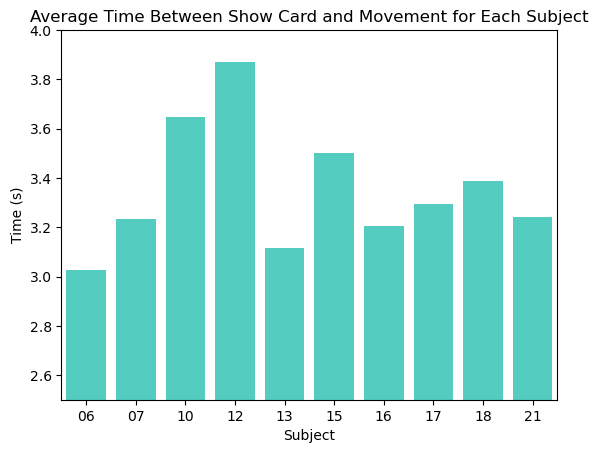

In [5]:
fig, axs = plt.subplots()
sns.barplot(x=np.arange(len(time_btwn_show_card_and_movement)), y=time_btwn_show_card_and_movement, ax=axs, color='turquoise')
axs.set_title('Average Time Between Show Card and Movement for Each Subject')
axs.set_xlabel('Subject')
axs.set_ylabel('Time (s)')
axs.set_xticklabels(subs)
axs.set_ylim(2.5, 4)